True Labels:      [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
Predicted Labels: [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
Training Accuracy: 100.00%


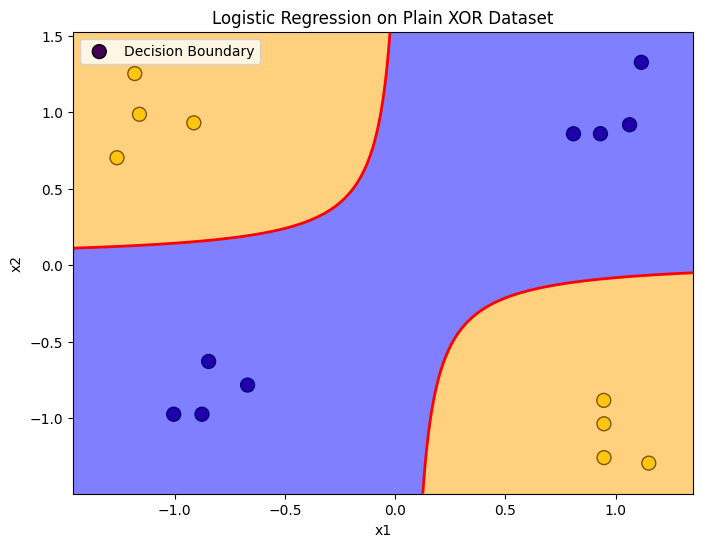

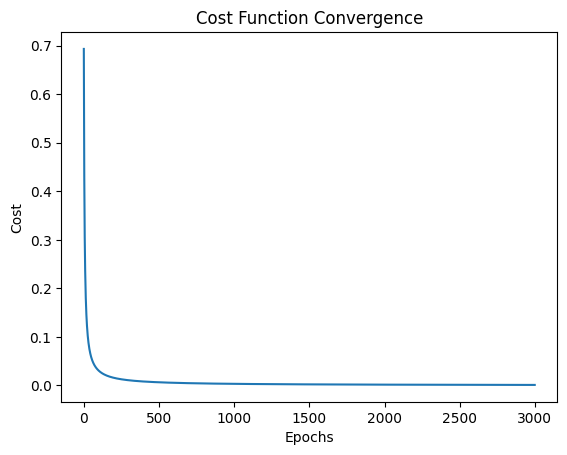

In [ ]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create Pseudo-XOR Dataset
def create_plain_xor_dataset():
    # Plain OR dataset: (0,0)->0, (1,0)->1, (0,1)->1, (1,1)->0
    data = [
        [0, 0, 0],  # (x1, x2, label)
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 0]
    ]
    data = np.array(data)
    return data[:, 0], data[:, 1], data[:, 2].astype(int)

def create_pseudo_xor_dataset():
    # Four clusters: (0,0)->0, (1,0)->1, (0,1)->1, (1,1)->0
    cluster_means = [(0, 0, 0), (1, 0, 1), (0, 1, 1), (1, 1, 0)]
    data = []
    np.random.seed(42)
    for cx, cy, label in cluster_means:
        x1 = np.random.normal(loc=cx, scale=0.1, size=4)  # 4 points per cluster
        x2 = np.random.normal(loc=cy, scale=0.1, size=4)
        labels = [label] * 4
        data.extend(zip(x1, x2, labels))
    data = np.array(data)
    return data[:, 0], data[:, 1], data[:, 2].astype(int)

# Step 2: Forward Model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_model(w, b, X):
    z = np.dot(X, w) + b
    return sigmoid(z)

# Step 3: Cost Function
def cost_function(y, y_pred):
    m = len(y)
    return -1/m * (np.dot(y, np.log(y_pred)) + np.dot((1 - y), np.log(1 - y_pred)))

# Step 4: Gradient Descent
def compute_gradient(X, y, y_pred):
    m = len(y)
    dw = 1/m * np.dot(X.T, (y_pred - y))
    db = 1/m * np.sum(y_pred - y)
    return dw, db

# Step 5: Training the Model
def train_logistic_regression(X, y, learning_rate=0.1, epochs=1000):
    w = np.zeros(X.shape[1])
    b = 0
    costs = []

    for epoch in range(epochs):
        y_pred = forward_model(w, b, X)
        cost = cost_function(y, y_pred)
        dw, db = compute_gradient(X, y, y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db
        costs.append(cost)

    return w, b, costs

def plot_results0(X_original, y, w, b):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_original[:, 0], X_original[:, 1], c=y, cmap='viridis', edgecolors='k', s=100)

    # Generate a grid of points for plotting
    x1_vals = np.linspace(X_original[:, 0].min() - 0.2, X_original[:, 0].max() + 0.2, 100)
    x2_vals = np.linspace(X_original[:, 1].min() - 0.2, X_original[:, 1].max() + 0.2, 100)
    x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

    # Compute the interaction term and decision boundary
    x3_grid = x1_grid * x2_grid  # Include the interaction term
    z = w[0] * x1_grid + w[1] * x2_grid + w[2] * x3_grid + b
    decision_boundary = sigmoid(z)

    # Contour plot for the decision boundary (threshold at 0.5)
    plt.contour(x1_grid, x2_grid, decision_boundary, levels=[0.5], colors='red', linewidths=2)

    plt.title("Logistic Regression on Plain XOR Dataset")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(["Decision Boundary", "Data Points"])
    plt.show()

def plot_results(X_original, y, w, b):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_original[:, 0], X_original[:, 1], c=y, cmap='viridis', edgecolors='k', s=100)

    # Generate a grid of points for plotting
    x1_vals = np.linspace(X_original[:, 0].min() - 0.2, X_original[:, 0].max() + 0.2, 100)
    x2_vals = np.linspace(X_original[:, 1].min() - 0.2, X_original[:, 1].max() + 0.2, 100)
    x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

    # Compute the interaction term and z
    x3_grid = x1_grid * x2_grid  # Include the interaction term
    z = w[0] * x1_grid + w[1] * x2_grid + w[2] * x3_grid + b

    # Create a filled contour plot to show binary regions
    plt.contourf(x1_grid, x2_grid, z, levels=[-np.inf, 0, np.inf], colors=['blue', 'orange'], alpha=0.5)

    # Overlay the decision boundary (z = 0)
    plt.contour(x1_grid, x2_grid, z, levels=[0], colors='red', linewidths=2)

    plt.title("Logistic Regression on Plain XOR Dataset")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(["Decision Boundary", "Data Points"])
    plt.show()

# Main Program
#x1, x2, y = create_plain_xor_dataset()
x1, x2, y = create_pseudo_xor_dataset()
# Step 1: Normalize x1 and x2
x1_norm = (x1 - np.mean(x1)) / np.std(x1)
x2_norm = (x2 - np.mean(x2)) / np.std(x2)

# Step 2: Create interaction term x3 after normalization
x3_norm = x1_norm * x2_norm  # Interaction term

# Step 3: Combine normalized features
X = np.column_stack((x1_norm, x2_norm, x3_norm))

# Train logistic regression model
w, b, costs = train_logistic_regression(X, y, learning_rate=0.5, epochs=3000)

# Predict the labels using the trained model
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)  # Compute probabilities
    return (y_pred >= 0.5).astype(int)  # Convert probabilities to binary labels (threshold = 0.5)

# Compute predictions on the training set
y_pred = predict(X, w, b)

# Compare predictions with true labels
print("True Labels:     ", y)
print("Predicted Labels:", y_pred)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

# Plot results using original data
plot_results(X, y, w, b)

# Plot cost function
plt.plot(range(len(costs)), costs)
plt.title("Cost Function Convergence")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()
